In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
from tqdm.auto import tqdm
import matplotlib.pyplot as plt 
import cv2 
from PIL import Image
import os 
import glob as gb

import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from torch.optim import Adam , lr_scheduler 
import torchvision 
from torchvision import datasets 
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchsummary import summary
from torchmetrics import ConfusionMatrix 
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score 
from sklearn.model_selection import train_test_split 

In [2]:
def walk_through_data(dir_path) : 
    for dirpath , dirnames , filenames in tqdm(os.walk(dir_path)) : 
        print(f"There are {len(dirnames)} directions and {len(filenames)} images in {dirpath}")

In [3]:
dataset_path='C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification'

In [4]:
walk_through_data(dataset_path)

0it [00:00, ?it/s]

There are 3 directions and 1 images in C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification
There are 0 directions and 1 images in C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification\.ipynb_checkpoints
There are 2 directions and 0 images in C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification\colon_image_sets
There are 0 directions and 5000 images in C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification\colon_image_sets\colon_aca
There are 0 directions and 5000 images in C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification\colon_image_sets\colon_n
There are 3 directions and 0 images in C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification\lung_image_sets
There are 0 directions and 5000 images in C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification\lung_image_sets\lung_aca
There are 0 directions and 5000 images in C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification\lung_image_

In [5]:
categories=[]
classes=[]
category=['colon_image_sets','lung_image_sets']
for cat in tqdm(os.listdir(dataset_path)) :
    if cat not in categories and cat in category: 
        print(cat)
        categories.append(cat.replace('_image_sets',''))
        
    if cat in category:
        for folder in os.listdir(dataset_path + "/" + cat) : 
            if folder not in classes : 
                classes.append(folder)

  0%|          | 0/4 [00:00<?, ?it/s]

colon_image_sets
lung_image_sets


In [6]:
categories

['colon', 'lung']

In [7]:
classes

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']

In [8]:
img_label={}
for key in categories : 
    dic={}
    for value in classes : 
        if key in value : 
            dic[value]=classes.index(value)
    img_label[key]=dic

In [9]:
img_label

{'colon': {'colon_aca': 0, 'colon_n': 1},
 'lung': {'lung_aca': 2, 'lung_n': 3, 'lung_scc': 4}}

In [10]:
dataset_path_list=[]
dataset_labels=[]
for cat in tqdm(os.listdir(dataset_path)) : 
    if cat !='Untitled.ipynb': 
        for folder in os.listdir(dataset_path + "/" + cat) : 
            files=gb.glob(pathname = str(dataset_path + "/" + cat + "/" + folder + "/*.jpeg"))
            for file in files : 
                dataset_path_list.append(file)
                dataset_labels.append(img_label[cat.replace('_image_sets','')][folder])

  0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
dataset_path_list

['C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification/colon_image_sets/colon_aca\\colonca1.jpeg',
 'C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification/colon_image_sets/colon_aca\\colonca10.jpeg',
 'C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification/colon_image_sets/colon_aca\\colonca100.jpeg',
 'C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification/colon_image_sets/colon_aca\\colonca1000.jpeg',
 'C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification/colon_image_sets/colon_aca\\colonca1001.jpeg',
 'C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification/colon_image_sets/colon_aca\\colonca1002.jpeg',
 'C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification/colon_image_sets/colon_aca\\colonca1003.jpeg',
 'C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification/colon_image_sets/colon_aca\\colonca1004.jpeg',
 'C:/Users/noora/Desktop/Qantev/Lung and colon Cancer Classification/colon_ima

In [12]:
dataset_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [13]:
np.unique(dataset_labels)

array([0, 1, 2, 3, 4])

In [14]:
### Split the data
train_path_list , test_path_list , train_labels , test_labels = train_test_split(dataset_path_list , dataset_labels , train_size=0.80 , random_state=0)

In [15]:
print(f"The size of the training set is : {len(train_path_list)}")
print(f"The size of the testing set is : {len(test_path_list)}")

The size of the training set is : 20000
The size of the testing set is : 5000


In [23]:
class InvalidDatasetException(Exception):
    
    def __init__(self,len_of_paths,len_of_labels):
        super().__init__(
            f"Number of paths ({len_of_paths}) is not compatible with number of labels ({len_of_labels})"
        )
        
    def __getitem__(self,index) : 
        
        image=Image.open(self.train_path[index])
        tensor_image=self.transform_method(image)
        label=self.train_label[index]
        return tensor_image , label 
        

In [37]:
###Gettting images into tensors
img_size=250
basic_transform=transforms.Compose([
     transforms.Resize(size=(img_size,img_size)) , 
     transforms.ToTensor()
 ])


class train_data(Dataset) : 
    def __init__(self,train_path , train_label , transform_method) : 
        self.train_path=train_path 
        self.train_label=train_label 
        self.transform_method = transform_method 
        if len(self.train_path) != len(self.train_label):
            raise InvalidDatasetException(self.train_path,self.train_label)
    def __len__(self) : 
        return len(self.train_path)
           
    def __getitem__(self,index) : 
        
        image=Image.open(self.train_path[index])
        tensor_image=self.transform_method(image)
        label=self.train_label[index]
        return tensor_image , label 

    
    
class test_data(Dataset) : 
    def __init__(self,test_path , test_label , transform_method) : 
        self.test_path = test_path 
        self.test_label = test_label 
        self.transform_method = transform_method 
        if len(self.test_path) != len(self.test_label):
            raise InvalidDatasetException(self.test_path,self.test_label)
            
             
    def __len__(self) : 
        return len(self.test_path) 
    
    
    def __getitem__(self,index) : 
        image=Image.open(self.test_path[index])
        tensor_image = self.transform_method(image)
        label=self.test_label[index]
        
        return tensor_image , label

In [38]:
train_set = train_data(train_path_list , train_labels , basic_transform) 

In [39]:
filer_train_image=train_set.__getitem__(1000)

In [40]:
filer_train_image[0].shape

torch.Size([3, 250, 250])

In [41]:
test_set = test_data(test_path_list , test_labels , basic_transform)

In [42]:
filer_test_image = test_set.__getitem__(2000)

In [43]:
filer_test_image[0].shape

torch.Size([3, 250, 250])

In [46]:
BATCH_SIZE=128
#Split your dataset into training and validation
train_path_list, valid_path_list, train_labels, valid_labels = train_test_split(
    train_path_list, train_labels, test_size=0.2, random_state=42  # You can adjust the test_size and random_state
)

# Create a training dataset
train_set = train_data(train_path_list, train_labels, basic_transform)

# Create a validation dataset
valid_set = train_data(valid_path_list, valid_labels, basic_transform)


In [47]:
# Create DataLoaders
torch.manual_seed(42)
train_dataloader = DataLoader(
    dataset=train_set,
    batch_size=BATCH_SIZE,
    shuffle=True
)

torch.manual_seed(42)
valid_dataloader = DataLoader(
    dataset=valid_set,
    batch_size=BATCH_SIZE,
    shuffle=False
)

torch.manual_seed(42)
test_dataloader=DataLoader(
    dataset=test_set , 
    batch_size = BATCH_SIZE , 
    shuffle=False 
)

In [48]:
print(f"the size of the train dataloader {len(train_dataloader)} batches of {BATCH_SIZE}")

the size of the train dataloader 1024 batches of 10


In [49]:
trainimage_sample , trainlabel_sample = next(iter(train_dataloader)) 
trainimage_sample.shape , trainlabel_sample.shape

(torch.Size([10, 3, 250, 250]), torch.Size([10]))

In [50]:
print(f"the size of the test dataloader {len(test_dataloader)} batches of {BATCH_SIZE}")

the size of the test dataloader 500 batches of 10


In [51]:
testimage_sample , testlabel_sample = next(iter(test_dataloader))
testimage_sample.shape , testlabel_sample.shape 

(torch.Size([10, 3, 250, 250]), torch.Size([10]))

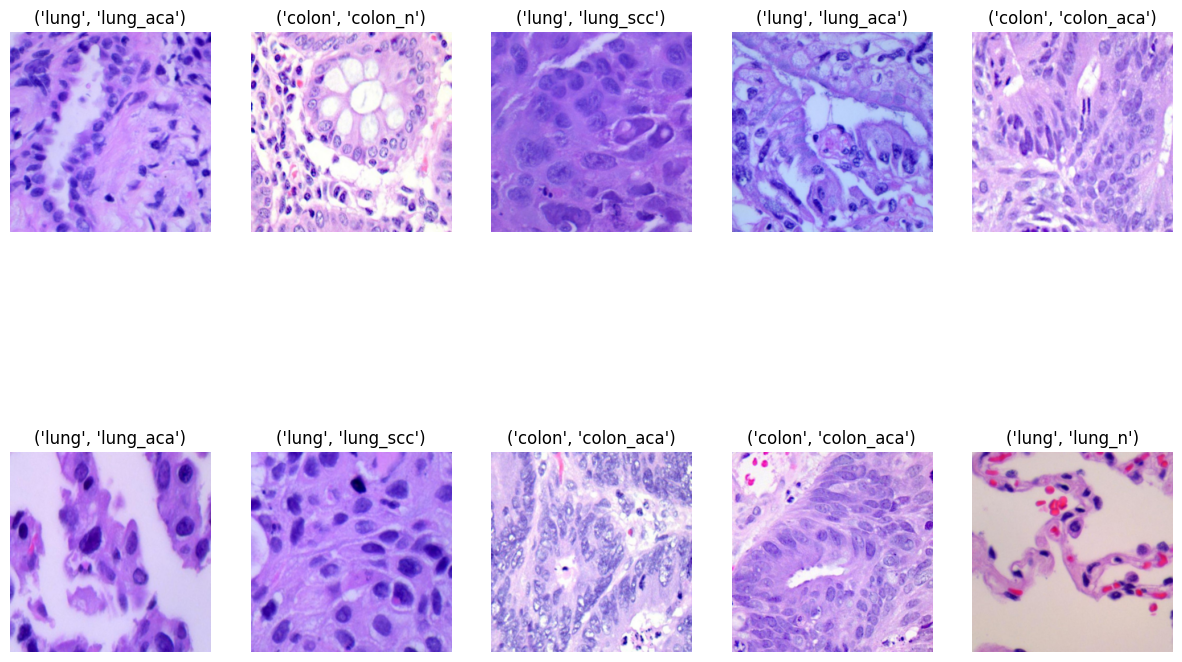

In [54]:
def getlabel(n) : 
    for i , j in img_label.items() : 
        for x , y in j.items() : 
            if n==y : 
                return i , x


fig, axis = plt.subplots(2, 5, figsize=(15, 10))
for i, ax in enumerate(axis.flat):
    with torch.no_grad():
        img = testimage_sample[i].numpy()
        img = np.transpose(img, (1, 2, 0))
        ax.imshow(img)
        ax.set(title = f"{getlabel(testlabel_sample[i])}")
        ax.axis('off')

In [55]:
#Build the model

class CNN(nn.Module) : 
    def __init__(self,input_shape , output) : 
        super().__init__()
        self.block1=nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape , 
                out_channels=32 , 
                kernel_size=(3,3) , 
                stride=2 , 
                padding = 1 
            ) , 
            
            nn.ReLU() , 
            
            nn.Conv2d(
                in_channels=32 , 
                out_channels=64 , 
                kernel_size=(3,3) , 
                stride=2 , 
                padding=1 
            ) , 
            
            nn.ReLU() , 
            
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.block2=nn.Sequential(
            nn.Conv2d(
                in_channels=64 , 
                out_channels=128 , 
                kernel_size=(3,3) , 
                stride = 2 , 
                padding = 1 
            ) , 
            
            nn.ReLU() , 
            
            nn.Conv2d(
                in_channels=128 , 
                out_channels=256 , 
                kernel_size = (3,3) , 
                stride = 2 , 
                padding = 1 
            ) ,
            
            nn.ReLU() , 
            
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.fully_connected_layer=nn.Sequential(
            nn.Flatten() , 
            nn.Linear(in_features=256*4*4
                      , out_features=output)
        )
        
        
    def forward(self,x) : 
        x=self.block1(x) 
#         print(f"The output shape of conv block1 is : {x.shape}\n\n")
        x=self.block2(x) 
#         print(f"The output shape of conv block2 is : {x.shape}\n\n")
        x=self.fully_connected_layer(x)
        return x


In [56]:
torch.manual_seed(42)
model=CNN(
    input_shape = 3 , 
    output=len(classes)
)

model.parameters


<bound method Module.parameters of CNN(
  (block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fully_connected_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=5, bias=True)
  )
)>

In [57]:
#Setting the cost function and the optimizer

criterion=nn.CrossEntropyLoss()
optimizer=Adam(model.parameters(),lr=0.001)

In [60]:
#Training the model

epochs = 10
training_acc = []
training_loss = []
validation_acc = []  # Store validation accuracy
validation_loss = []  # Store validation loss

for i in tqdm(range(epochs)):
    epoch_loss = 0
    epoch_acc = 0

    # Training loop
    for batch, (x_train, y_train) in enumerate(train_dataloader):
        y_pred = model.forward(x_train)

        loss = criterion(y_pred, y_train)

        if batch % 100 == 0:
            print(f"Looked at {batch * len(x_train)}/{len(train_dataloader.dataset)} samples.")

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += loss.item()
        epoch_acc += accuracy_score(y_train, y_pred.argmax(dim=1))

    training_loss.append(epoch_loss / len(train_dataloader))
    training_acc.append(epoch_acc / len(train_dataloader))

    print(f"Epoch {i}: Training Accuracy: {(epoch_acc / len(train_dataloader)) * 100}%, Training Loss: {epoch_loss / len(train_dataloader)}\n")

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_loss = 0
        val_acc = 0
        for batch, (x_val, y_val) in enumerate(valid_dataloader):
            y_val_pred = model.forward(x_val)
            val_loss += criterion(y_val_pred, y_val).item()
            val_acc += accuracy_score(y_val, y_val_pred.argmax(dim=1))

    model.train()  # Set the model back to training mode

    validation_loss.append(val_loss / len(valid_dataloader))
    validation_acc.append(val_acc / len(valid_dataloader))

    print(f"Epoch {i}: Validation Accuracy: {(val_acc / len(valid_dataloader)) * 100}%, Validation Loss: {val_loss / len(valid_dataloader)}\n")

  0%|          | 0/10 [00:00<?, ?it/s]

Looked at 0/10240 samples.
Looked at 1000/10240 samples.
Looked at 2000/10240 samples.
Looked at 3000/10240 samples.
Looked at 4000/10240 samples.
Looked at 5000/10240 samples.
Looked at 6000/10240 samples.
Looked at 7000/10240 samples.
Looked at 8000/10240 samples.
Looked at 9000/10240 samples.
Looked at 10000/10240 samples.
Epoch 0: Training Accuracy: 87.67578124999926%, Training Loss: 0.29914527025721327

Epoch 0: Validation Accuracy: 91.3281250000002%, Validation Loss: 0.20451272941045318

Looked at 0/10240 samples.
Looked at 1000/10240 samples.
Looked at 2000/10240 samples.
Looked at 3000/10240 samples.
Looked at 4000/10240 samples.
Looked at 5000/10240 samples.
Looked at 6000/10240 samples.
Looked at 7000/10240 samples.
Looked at 8000/10240 samples.
Looked at 9000/10240 samples.
Looked at 10000/10240 samples.
Epoch 1: Training Accuracy: 91.16210937499932%, Training Loss: 0.21525871538278807

Epoch 1: Validation Accuracy: 92.7343750000002%, Validation Loss: 0.18087688985724526

Lo

In [63]:
print(f"The loss of the training set is : {training_loss[-1]}")
print(f"The accuracy of the training set is : {training_acc[-1]:0.3f}")

The loss of the training set is : 0.07368777722950837
The accuracy of the training set is : 0.976


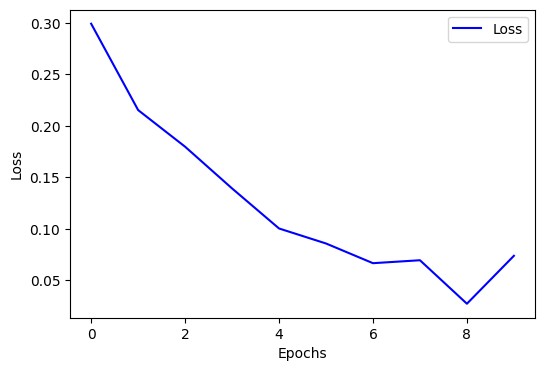

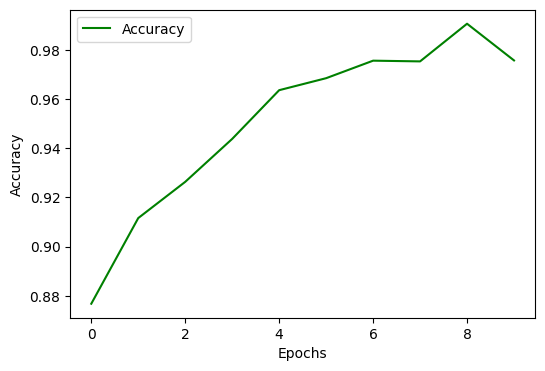

In [64]:
#plot the results
plt.subplots(figsize=(6,4))
plt.plot(range(epochs),training_loss,color="blue",label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.subplots(figsize=(6,4))
plt.plot(range(epochs),training_acc,color="green",label="Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
#Model Evaluation
test_loss=0
test_acc= 0
test_preds=[]
test_targets = []
torch.manual_seed(42)
with torch.no_grad() : 
        for x_test , y_test in test_dataloader : 
            y_pred=model.forward(x_test)
            test_pred = torch.softmax(y_pred , dim=1 ).argmax(dim=1)
            test_preds.append(test_pred)
            test_targets.extend(y_test)
            
            loss=criterion(y_pred,y_test)
            test_loss+=loss
            test_acc += accuracy_score(y_test , y_pred.argmax(dim=1))
            
            
test_loss/=len(test_dataloader)
test_acc/=len(test_dataloader)
test_preds = torch.cat(test_preds)
test_targets = torch.Tensor(test_targets)

In [66]:
#Model loss for the test data 
print(f"The loss of the testing set is : {test_loss}\n")
print(f"The accuracy of the testing set is : {(test_acc*100):0.2f}%\n")

The loss of the testing set is : 0.15105314552783966

The accuracy of the testing set is : 95.62%



In [68]:
#Make predictions

y_preds = [] 

torch.manual_seed(42)
with torch.no_grad() : 
    
        y_pred = model.forward(x_test) 
        
        y_pred = torch.softmax(y_pred , dim=1 ).argmax(dim=1)
        y_preds.append(y_pred)
        
y_preds = torch.cat(y_preds)

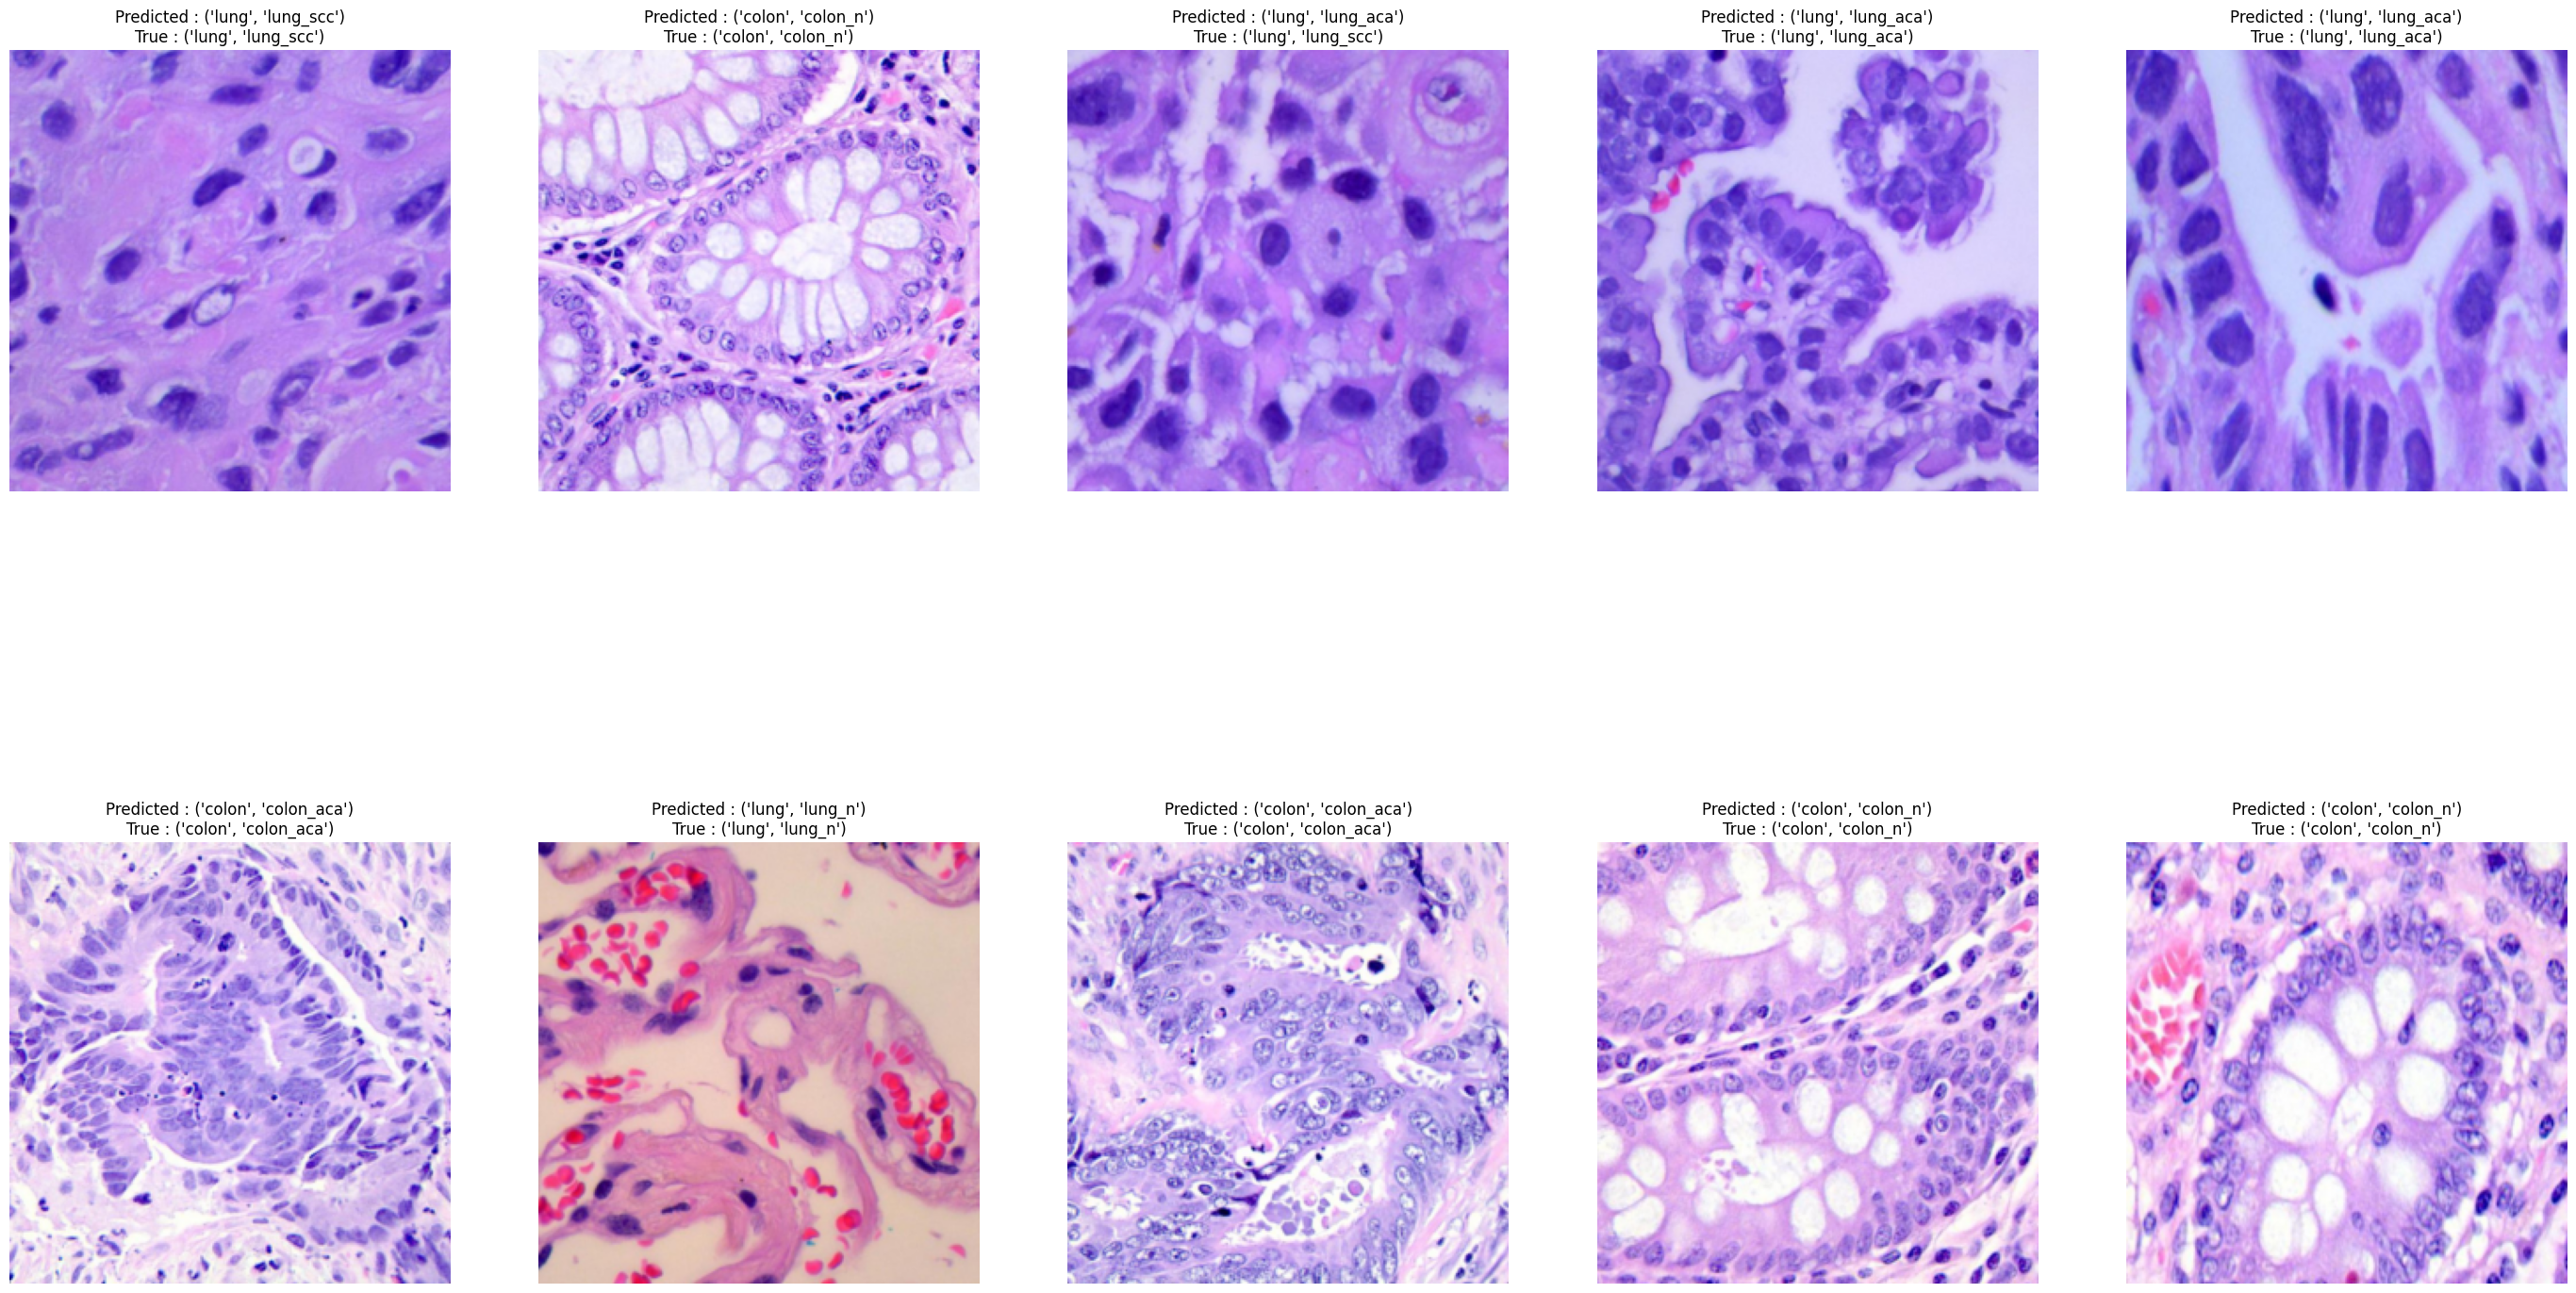

In [71]:
fig, axis = plt.subplots(2, 5, figsize=(35, 20))
for i, ax in enumerate(axis.flat):
    with torch.no_grad():
        img = x_test[i].numpy()
        img = np.transpose(img, (1, 2, 0))
        ax.imshow(img)
        ax.set(title = f"Predicted : {getlabel(y_preds[i])}\nTrue : {getlabel(y_test[i])}")
        ax.axis('off')


In [72]:
#Measuring performance

print(f"The accuracy of the training set is : {(training_acc[-1] * 100):0.2f}%")
print(f"The accuracy of the testing set is : {(test_acc*100):0.2f}%\n")
print(f"\nRecall : {recall_score(test_targets,test_preds,average='weighted')}")
print(f"\nPrecision : {precision_score(test_targets,test_preds,average='weighted')}")
print(f"\nF1 Score {f1_score(test_targets,test_preds,average='weighted')}\n")



The accuracy of the training set is : 97.58%
The accuracy of the testing set is : 95.62%


Recall : 0.9562

Precision : 0.9578953522462994

F1 Score 0.9562220844568047



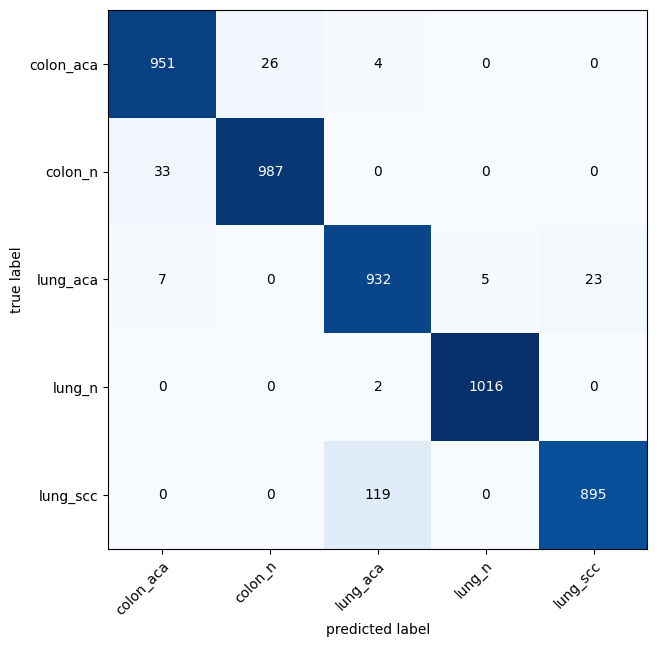

In [73]:
confmat = ConfusionMatrix(num_classes=len(classes), task='multiclass')
confmat_tensor = confmat(preds=test_preds,
                         target=test_targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=classes,
    figsize=(10, 7)
)

In [74]:
#Save our model

torch.save(model.state_dict(), 'lung-and-colon-cancer-classification.pt')